# Diffusion Model demo

This notebooks loads initiates the text to image model and creates the images

Import libraries

In [ ]:
import model_loader
import pipeline 
from PIL import Image
from transformers import CLIPTokenizer
import torch

Define the device

In [ ]:
DEVICE = "cpu"

ALLOW_MPS = False  # Disabled due to memory constraints

if torch.backends.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"

print(f"Using device: {DEVICE}")

Define the tokenizer, weights, and models

In [ ]:
tokenizer = CLIPTokenizer("/Users/michelangelozampieri/Desktop/text_to_image_model/data/vocab.json", merges_file="/Users/michelangelozampieri/Desktop/text_to_image_model/data/merges.txt")
model_file = "/Users/michelangelozampieri/Desktop/text_to_image_model/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

Define the paramaters

In [ ]:
# Text to Image 
prompt = "A dog playing with a ball in a sunny park, vibrant colors, high contrast, 50mm lens, 4k resolution."
uncond_prompt = ""
do_cfg = True
cfg_scale = 7

In [ ]:
# Image to Image 
input_image = None
# image_path = ""
strength = 0.9

Define the sampler

In [ ]:
sampler = "ddpm"
num_inference_steps = 50
seed = 42

print(f"Using sampler: {sampler}, steps: {num_inference_steps}, seed: {seed}")

Generate the image

Using device: cpu
Using sampler: ddpm, steps: 50, seed: 42


100%|██████████| 50/50 [14:04<00:00, 16.89s/it]


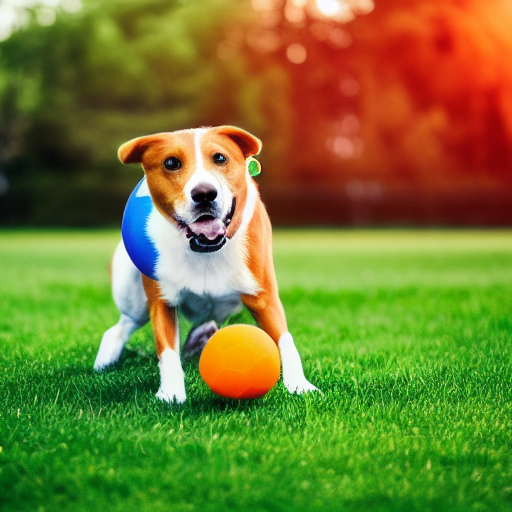

In [ ]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)